## Histogram Equalisation

In [1]:
path = 'C:\IITGN 2nd year\ES 204 Digital Systems\Local-Contrast-Enhancement-of-Image\Local Contrast Enhancement of Image\\141.jpg'
import matplotlib.image as Image
import numpy as np
import matplotlib.pyplot as plt

(150, 150)
(150, 150)


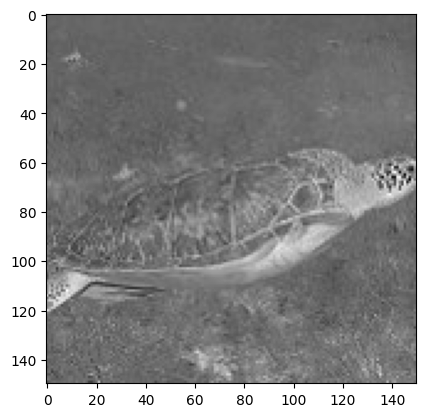

In [2]:
img= Image.imread(path)
print (img.shape)
# image has same rgb value means it is gray scale but stored in the rgb format
# gray_img=img[:,:,0]
gray_img=img
print (gray_img.shape)

plt.imshow(gray_img, cmap='gray')


In [3]:
gray_img = np.asarray(gray_img)
img_1d = gray_img.flatten()
print(img_1d.shape)

(22500,)


<BarContainer object of 256 artists>

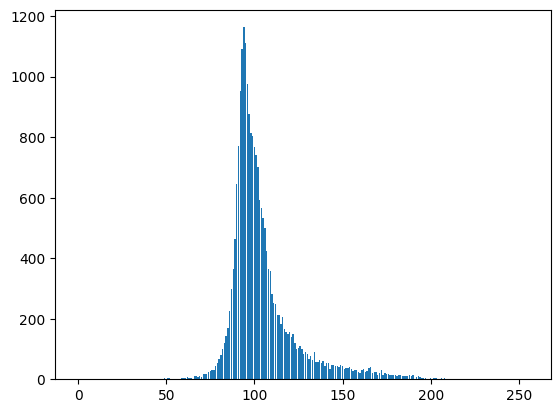

In [4]:
intensity=np.zeros(256)
for pixel in img_1d:
    intensity[pixel]+=1

plt.bar(range(256),intensity)


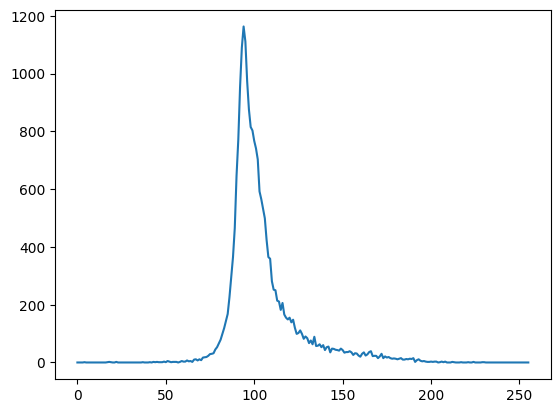

In [5]:
pdf = intensity

plt.plot(pdf)

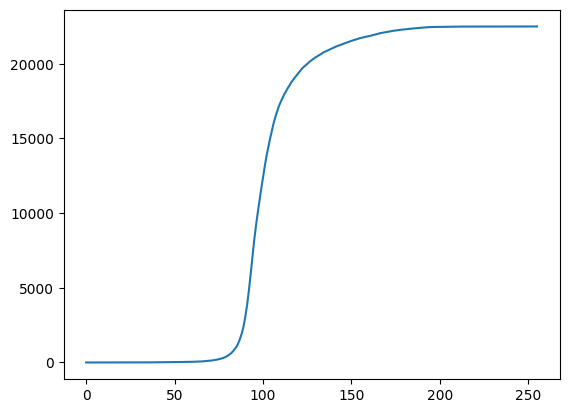

In [6]:
cdf = np.zeros(256)
cdf[0] = pdf[0]
for i in range(1,256):
    cdf[i] = cdf[i-1]+pdf[i]

plt.plot(cdf)

In [7]:
cdf_normalized = (cdf -cdf[cdf>0].min())/(img_1d.size - cdf[cdf>0].min())
print(cdf[cdf>0].min())
histo_equal = np.round(cdf_normalized*(255)).astype(np.uint8)

print(histo_equal)
print(gray_img)
print(histo_equal[gray_img])


1.0
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   1   1   1   1   1   1   1   1   1   1   1   1
   2   2   2   2   3   3   4   4   5   6   7   8  10  12  15  18  22  27
  35  43  54  67  80  92 103 113 122 132 140 149 157 163 170 176 181 186
 190 194 198 201 203 206 208 210 213 214 216 218 220 221 223 224 225 227
 228 229 230 231 232 233 233 234 235 236 236 237 238 238 239 240 240 241
 241 242 242 243 243 244 244 245 245 245 246 246 246 247 247 247 248 248
 248 249 249 249 250 250 250 251 251 251 251 252 252 252 252 252 253 253
 253 253 253 253 253 253 254 254 254 254 254 254 254 254 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 25

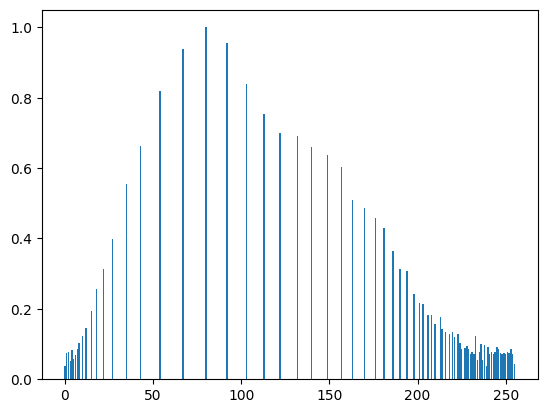

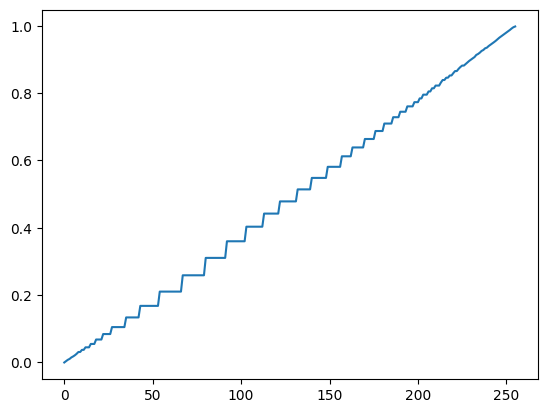

In [8]:
equalized_img = histo_equal[gray_img]

equalized_intensity = np.zeros(256)
for pixel in equalized_img.flatten():
    equalized_intensity[pixel] += 1

cdf_equal = np.zeros(256)
for i in range(1,256):
    cdf_equal[i] = cdf_equal[i-1]+equalized_intensity[i]

plt.bar(range(256),equalized_intensity/np.max(intensity))
plt.show()
plt.plot(cdf_equal/np.max(cdf))


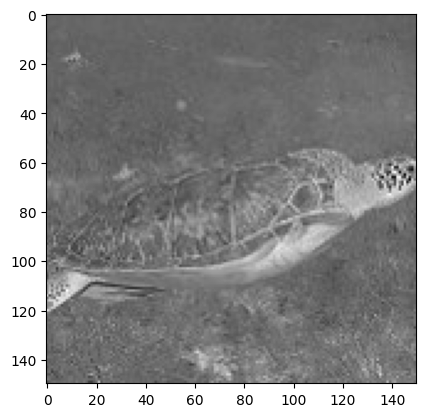

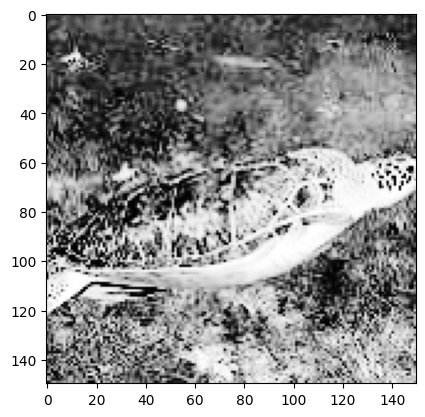

In [9]:
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(equalized_img, cmap='gray')